In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import sklearn
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Import necessary modules
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score


df = pd.read_csv('plays.csv')
df.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
0,2018090600,37,J.Elliott kicks 65 yards from PHI 35 to end zo...,1,0,0,PHI,Kickoff,Touchback,44966.0,...,NaN,NaN,NaN,0,0,NaN,66.0,NaN,40,45
1,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Ce...",1,4,4,PHI,Punt,Return,45603.0,...,UNSd,PHI 18,-15.0,0,0,NaN,56.0,5.0,36,18
2,2018090600,658,"(5:03) M.Bryant 21 yard field goal is GOOD, Ce...",1,4,3,ATL,Field Goal,Kick Attempt Good,27091.0,...,NaN,NaN,NaN,0,0,NaN,21.0,NaN,0,13
3,2018090600,677,M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...,1,0,0,ATL,Kickoff,Return,37267.0,...,NaN,NaN,NaN,0,3,NaN,64.0,30.0,34,75
4,2018090600,872,"(:33) C.Johnston punts 65 yards to end zone, C...",1,4,18,PHI,Punt,Touchback,45603.0,...,NaN,NaN,NaN,0,3,NaN,65.0,NaN,45,45


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19979 entries, 0 to 19978
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  19979 non-null  int64  
 1   playId                  19979 non-null  int64  
 2   playDescription         19979 non-null  object 
 3   quarter                 19979 non-null  int64  
 4   down                    19979 non-null  int64  
 5   yardsToGo               19979 non-null  int64  
 6   possessionTeam          19979 non-null  object 
 7   specialTeamsPlayType    19979 non-null  object 
 8   specialTeamsResult      19979 non-null  object 
 9   kickerId                19878 non-null  float64
 10  returnerId              6938 non-null   object 
 11  kickBlockerId           100 non-null    float64
 12  yardlineSide            19813 non-null  object 
 13  yardlineNumber          19979 non-null  int64  
 14  gameClock               19979 non-null

In [21]:
df.describe()

,gameId,playId,quarter,down,yardsToGo,kickerId,kickBlockerId,yardlineNumber,penaltyYards,preSnapHomeScore,preSnapVisitorScore,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
count,1.997900e+04,19979.000000,19979.000000,19979.000000,19979.000000,19878.000000,100.000000,19979.000000,1102.000000,19979.000000,19979.000000,16327.000000,5324.000000,19979.000000,19979.000000
mean,2.019114e+09,2037.557886,2.484058,1.707142,3.750288,41354.183821,43612.470000,28.749687,3.918330,12.208669,11.565544,54.744166,15.905522,27.315932,59.637569
std,8.519225e+05,1228.659555,1.109341,1.968283,5.671644,5845.474315,3834.614322,10.790720,8.836318,10.063814,10.006012,15.892992,13.150236,20.556990,23.830840
min,2.018091e+09,35.000000,1.000000,0.000000,0.000000,21213.000000,33131.000000,1.000000,-15.000000,0.000000,0.000000,2.000000,-16.000000,-72.000000,11.000000
25%,2.018120e+09,985.000000,2.000000,0.000000,0.000000,38691.000000,41438.250000,16.000000,0.000000,3.000000,3.000000,43.000000,6.000000,0.000000,45.000000
50%,2.019110e+09,2033.000000,2.000000,0.000000,0.000000,42333.000000,43797.000000,35.000000,9.000000,10.000000,10.000000,55.000000,15.000000,39.000000,59.000000
75%,2.020100e+09,3027.000000,3.000000,4.000000,7.000000,45576.000000,46216.500000,35.000000,10.000000,19.000000,17.000000,70.000000,23.000000,40.000000,75.000000
max,2.021010e+09,5729.000000,5.000000,4.000000,46.000000,53146.000000,52592.000000,50.000000,18.000000,56.000000,59.000000,90.000000,104.000000,82.000000,109.000000


In [22]:
# set up the figure size
plt.rcParams['figure.figsize'] = (10,5)

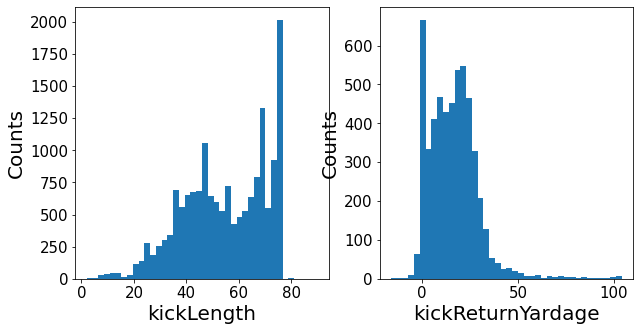

In [23]:
# make subplots of the means
fig, axes = plt.subplots(nrows = 1, ncols = 2)

# Specify the features of interest
num_features = ['kickLength', 'kickReturnYardage']
xaxes = num_features
yaxes = ['Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

In [24]:
df.isnull().sum()

gameId                        0
playId                        0
playDescription               0
quarter                       0
down                          0
yardsToGo                     0
possessionTeam                0
specialTeamsPlayType          0
specialTeamsResult            0
kickerId                    101
returnerId                13041
kickBlockerId             19879
yardlineSide                166
yardlineNumber                0
gameClock                     0
penaltyCodes              18877
penaltyJerseyNumbers      18877
penaltyYards              18877
preSnapHomeScore              0
preSnapVisitorScore           0
passResult                19934
kickLength                 3652
kickReturnYardage         14655
playResult                    0
absoluteYardlineNumber        0
dtype: int64

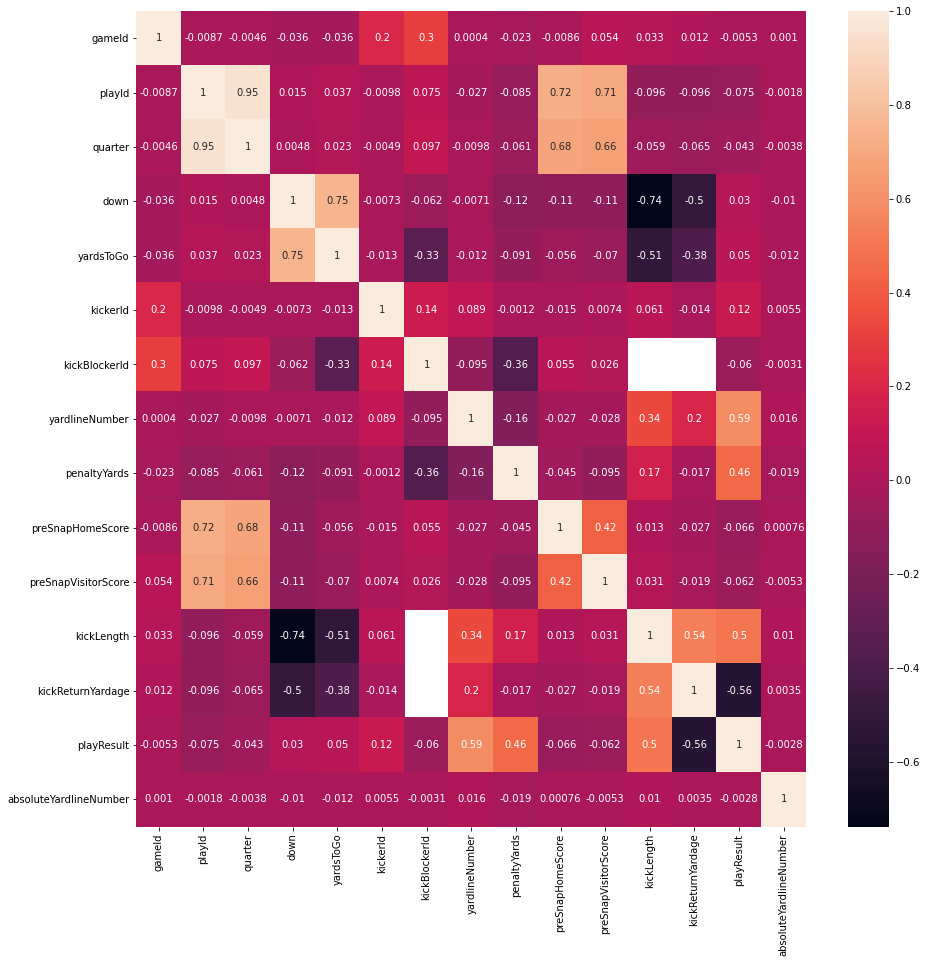

In [25]:
import seaborn as sns
plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [26]:
df.specialTeamsPlayType.unique()

array(['Kickoff', 'Punt', 'Field Goal', 'Extra Point'], dtype=object)

In [27]:
df.specialTeamsResult.unique()

array(['Touchback', 'Return', 'Kick Attempt Good', 'Fair Catch', 'Downed',
       'Muffed', 'Kick Attempt No Good', 'Out of Bounds',
       'Non-Special Teams Result', 'Blocked Kick Attempt', 'Blocked Punt',
       'Kickoff Team Recovery'], dtype=object)

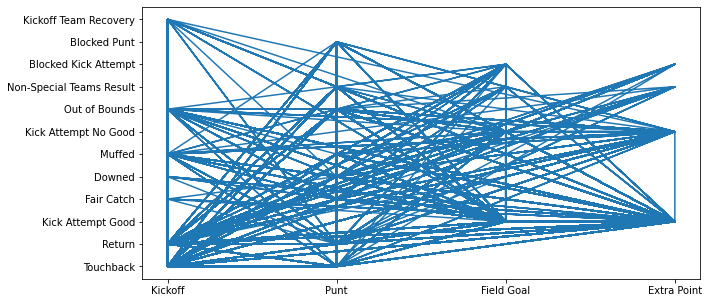

In [28]:
plt.plot(df.specialTeamsPlayType,df.specialTeamsResult)

In [29]:
# set up the figure size
plt.rcParams['figure.figsize'] = (15,10)

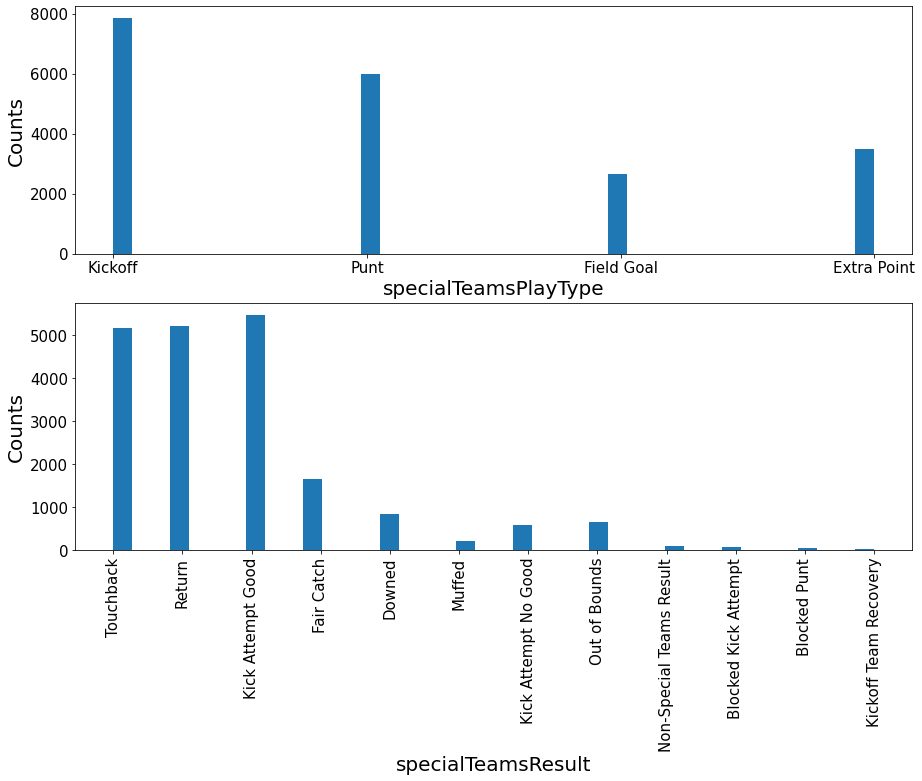

In [30]:
# make subplots of the means
fig, axes = plt.subplots(nrows = 2, ncols = 1)

# Specify the features of interest
num_features = ['specialTeamsPlayType', 'specialTeamsResult']
xaxes = num_features
yaxes = ['Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

In [187]:
df1 = pd.read_csv('Team_Wins2.csv')
df1.head()

,TEAM,Wins,WIN %,MOV,ATS +/-
0,BAL,14,0.875,15.6,10.2
1,NO,13,0.812,7.3,3.1
2,SF,13,0.812,10.6,6.5
3,GB,13,0.812,3.9,0.2
4,KC,12,0.750,8.9,4.3


In [188]:
df1_key = df.set_index('possessionTeam')
df2_key = df1.set_index('TEAM')
df_team = df1_key.join(df2_key, lsuffix='_left', rsuffix='_right')

In [189]:
df_team

,gameId,playId,playDescription,quarter,down,yardsToGo,specialTeamsPlayType,specialTeamsResult,kickerId,returnerId,...,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber,Wins,WIN %,MOV,ATS +/-
ARI,2018090909,36,P.Dawson kicks 66 yards from ARI 35 to WAS -1....,1,0,0,Kickoff,Return,23860.0,46329,...,0,NaN,66.0,24.0,42,45,5.0,0.333,-5.1,0.5
ARI,2018090909,501,"(5:57) A.Lee punts 60 yards to end zone, Cente...",1,4,1,Punt,Touchback,29141.0,NaN,...,0,NaN,60.0,NaN,40,50,5.0,0.333,-5.1,0.5
ARI,2018090909,918,"(13:27) A.Lee punts 57 yards to WAS 15, Center...",2,4,7,Punt,Return,29141.0,46325,...,7,NaN,57.0,12.0,45,82,5.0,0.333,-5.1,0.5
ARI,2018090909,1416,"(3:27) A.Lee punts 56 yards to WAS 17, Center-...",2,4,8,Punt,Fair Catch,29141.0,46325,...,14,NaN,56.0,NaN,65,83,5.0,0.333,-5.1,0.5
ARI,2018090909,1990,"(12:59) A.Lee punts 33 yards to WAS 8, Center-...",3,4,3,Punt,Fair Catch,29141.0,46325,...,21,NaN,33.0,NaN,33,51,5.0,0.333,-5.1,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WAS,2021010309,2320,"(9:39) T.Way punts 48 yards to PHI 29, Center-...",3,4,5,Punt,Fair Catch,40600.0,45607,...,17,NaN,48.0,NaN,48,33,3.0,0.188,-10.6,-3.2
WAS,2021010309,2935,"(12:47) T.Way punts 48 yards to PHI 21, Center...",4,4,4,Punt,Return,40600.0,45607,...,17,NaN,48.0,0.0,58,79,3.0,0.188,-10.6,-3.2
WAS,2021010309,3285,"(7:46) D.Hopkins 42 yard field goal is GOOD, C...",4,4,9,Field Goal,Kick Attempt Good,40125.0,NaN,...,17,NaN,42.0,NaN,0,34,3.0,0.188,-10.6,-3.2
WAS,2021010309,3304,D.Hopkins kicks 65 yards from WAS 35 to end zo...,4,0,0,Kickoff,Touchback,40125.0,NaN,...,20,NaN,75.0,NaN,40,75,3.0,0.188,-10.6,-3.2


Delete Some Columns

In [190]:
del df_team['gameId']
del df_team['playId']
del df_team['playDescription']
del df_team['gameClock']
del df_team['penaltyCodes'] 
del df_team['penaltyJerseyNumbers']
del df_team['yardlineSide']

df_team.head()

,quarter,down,yardsToGo,specialTeamsPlayType,specialTeamsResult,kickerId,returnerId,kickBlockerId,yardlineNumber,penaltyYards,...,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber,Wins,WIN %,MOV,ATS +/-
ARI,1,0,0,Kickoff,Return,23860.0,46329,NaN,35,NaN,...,0,NaN,66.0,24.0,42,45,5.0,0.333,-5.1,0.5
ARI,1,4,1,Punt,Touchback,29141.0,NaN,NaN,40,NaN,...,0,NaN,60.0,NaN,40,50,5.0,0.333,-5.1,0.5
ARI,2,4,7,Punt,Return,29141.0,46325,NaN,28,NaN,...,7,NaN,57.0,12.0,45,82,5.0,0.333,-5.1,0.5
ARI,2,4,8,Punt,Fair Catch,29141.0,46325,NaN,27,9.0,...,14,NaN,56.0,NaN,65,83,5.0,0.333,-5.1,0.5
ARI,3,4,3,Punt,Fair Catch,29141.0,46325,NaN,41,NaN,...,21,NaN,33.0,NaN,33,51,5.0,0.333,-5.1,0.5


In [191]:
df_team = df_team.fillna (0)
df_team.head()

,quarter,down,yardsToGo,specialTeamsPlayType,specialTeamsResult,kickerId,returnerId,kickBlockerId,yardlineNumber,penaltyYards,...,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber,Wins,WIN %,MOV,ATS +/-
ARI,1,0,0,Kickoff,Return,23860.0,46329,0.0,35,0.0,...,0,0,66.0,24.0,42,45,5.0,0.333,-5.1,0.5
ARI,1,4,1,Punt,Touchback,29141.0,0,0.0,40,0.0,...,0,0,60.0,0.0,40,50,5.0,0.333,-5.1,0.5
ARI,2,4,7,Punt,Return,29141.0,46325,0.0,28,0.0,...,7,0,57.0,12.0,45,82,5.0,0.333,-5.1,0.5
ARI,2,4,8,Punt,Fair Catch,29141.0,46325,0.0,27,9.0,...,14,0,56.0,0.0,65,83,5.0,0.333,-5.1,0.5
ARI,3,4,3,Punt,Fair Catch,29141.0,46325,0.0,41,0.0,...,21,0,33.0,0.0,33,51,5.0,0.333,-5.1,0.5


In [192]:
df_team = pd.get_dummies(df_team, columns=['specialTeamsPlayType','specialTeamsResult',], drop_first=True)
df_team.head()

,quarter,down,yardsToGo,kickerId,returnerId,kickBlockerId,yardlineNumber,penaltyYards,preSnapHomeScore,preSnapVisitorScore,...,specialTeamsResult_Downed,specialTeamsResult_Fair Catch,specialTeamsResult_Kick Attempt Good,specialTeamsResult_Kick Attempt No Good,specialTeamsResult_Kickoff Team Recovery,specialTeamsResult_Muffed,specialTeamsResult_Non-Special Teams Result,specialTeamsResult_Out of Bounds,specialTeamsResult_Return,specialTeamsResult_Touchback
ARI,1,0,0,23860.0,46329,0.0,35,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
ARI,1,4,1,29141.0,0,0.0,40,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
ARI,2,4,7,29141.0,46325,0.0,28,0.0,0,7,...,0,0,0,0,0,0,0,0,1,0
ARI,2,4,8,29141.0,46325,0.0,27,9.0,0,14,...,0,1,0,0,0,0,0,0,0,0
ARI,3,4,3,29141.0,46325,0.0,41,0.0,0,21,...,0,1,0,0,0,0,0,0,0,0


In [193]:
df_teams = pd.read_csv('newfile.csv')
df_teams

,Team,quarter,down,yardsToGo,kickerId,returnerId,kickBlockerId,yardlineNumber,penaltyYards,preSnapHomeScore,...,specialTeamsResult_Downed,specialTeamsResult_Fair Catch,specialTeamsResult_Kick Attempt Good,specialTeamsResult_Kick Attempt No Good,specialTeamsResult_Kickoff Team Recovery,specialTeamsResult_Muffed,specialTeamsResult_Non-Special Teams Result,specialTeamsResult_Out of Bounds,specialTeamsResult_Return,specialTeamsResult_Touchback
0,ARI,1,0,0,23860,46329,0,35,0,0,...,0,0,0,0,0,0,0,0,1,0
1,ARI,1,4,1,29141,0,0,40,0,0,...,0,0,0,0,0,0,0,0,0,1
2,ARI,2,4,7,29141,46325,0,28,0,0,...,0,0,0,0,0,0,0,0,1,0
3,ARI,2,4,8,29141,46325,0,27,9,0,...,0,1,0,0,0,0,0,0,0,0
4,ARI,3,4,3,29141,46325,0,41,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21260,WAS,3,4,5,40600,45607,0,23,0,14,...,0,1,0,0,0,0,0,0,0,0
21261,WAS,4,4,4,40600,45607,0,31,10,14,...,0,0,0,0,0,0,0,0,1,0
21262,WAS,4,4,9,40125,0,0,24,0,14,...,0,0,1,0,0,0,0,0,0,0
21263,WAS,4,0,0,40125,0,0,35,0,14,...,0,0,0,0,0,0,0,0,0,1


In [194]:
df_teams = pd.get_dummies(df_teams, columns=['Team'], drop_first=False)
df_teams.head()

,quarter,down,yardsToGo,kickerId,returnerId,kickBlockerId,yardlineNumber,penaltyYards,preSnapHomeScore,preSnapVisitorScore,...,Team_NYG,Team_NYJ,Team_OAK,Team_PHI,Team_PIT,Team_SEA,Team_SF,Team_TB,Team_TEN,Team_WAS
0,1,0,0,23860,46329,0,35,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,4,1,29141,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,4,7,29141,46325,0,28,0,0,7,...,0,0,0,0,0,0,0,0,0,0
3,2,4,8,29141,46325,0,27,9,0,14,...,0,0,0,0,0,0,0,0,0,0
4,3,4,3,29141,46325,0,41,0,0,21,...,0,0,0,0,0,0,0,0,0,0


In [195]:
df_train, df_test = train_test_split(df_teams, test_size=0.3, random_state=80)

In [196]:
from sklearn.preprocessing import StandardScaler


df_sub = df_train['Wins']
del df_train['Wins']

df_stest = df_test['Wins']
del df_test['Wins']

In [197]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14885 entries, 16712 to 17583
Data columns (total 65 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   quarter                                      14885 non-null  int64  
 1   down                                         14885 non-null  int64  
 2   yardsToGo                                    14885 non-null  int64  
 3   kickerId                                     14885 non-null  int64  
 4   returnerId                                   14885 non-null  object 
 5   kickBlockerId                                14885 non-null  int64  
 6   yardlineNumber                               14885 non-null  int64  
 7   penaltyYards                                 14885 non-null  int64  
 8   preSnapHomeScore                             14885 non-null  int64  
 9   preSnapVisitorScore                          14885 non-null  int64  

In [198]:
del df_train['returnerId']
del df_test['returnerId']

In [199]:
del df_train['passResult']
del df_test['passResult']

In [200]:

#scale the data to standardize it for use in the model
scaler = StandardScaler()
scaler.fit(df_train)



X = scaler.transform(df_train)
y = df_sub

X_test = scaler.transform(df_test)

print(X.shape)
print(y.shape)

(14885, 63)
(14885,)


In [203]:
#Create a logistic Regression model and fit the data to it
logistic_regression = LogisticRegression(random_state=0, multi_class="ovr")
model = logistic_regression.fit(X,y)

In [204]:
y_test = df_stest

#based on the prediction print the Classification Report
test_prob = model.predict_proba(X_test)[:, 1]
test_pred = model.predict(X_test)


print(confusion_matrix(y_test, test_pred))
print('\nClassification Report')
print(classification_report(y_test, test_pred))

[[ 617    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0  164    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0  166    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0  175    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0  758    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0  356    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0 1039    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0  564    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0  559    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0  597    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0  200    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0  387    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0  582    0]
 [   0    0    0    0    0    0    0    0    0    0